In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 27 18:15:59 2018
@author: moyuli
"""

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
import sklearn
import pandas as pd
plt.style.use('ggplot')


### Training the model

In [34]:
def train_model_LR(X,Y):
    # time series data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


    logreg = linear_model.LogisticRegression(C=1e-5)
    # class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’liblinear’, max_iter=100, multi_class=’ovr’, verbose=0, warm_start=False, n_jobs=1)[source]¶

    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(X_train, Y_train)

    Y_predict = logreg.predict(X_test)
    performance = LA.norm(Y_test-Y_predict)

    # Tune the model 
    norm_best = 100000000
    parameters = np.arange(0.1, 1.0, 0.1)
    for i, C in enumerate(parameters):
        logreg = linear_model.LogisticRegression(C=C, penalty='l2', tol=0.01)
        logreg.fit(X_train,Y_train)
        Y_predict = logreg.predict(X_test)
        norm = LA.norm(Y_test-Y_predict)
        #print(norm)
        if norm < norm_best:
            logregbest = logreg
            norm_best = norm

    logreg = logregbest
    return logreg,X_test

### First features: relative X and relative Y

In [35]:
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

MLInput=pd.read_csv('Input1')
MLInput=MLInput.drop(['Unnamed: 0'], axis=1)

# import some data to play with
X = MLInput.iloc[:,1:3]
Y = MLInput.iloc[:,-1]

# print X.head()
# print '\n'
# print Y.head()

[logreg,X_test]=train_model_LR(X,Y)

### Plotting the results

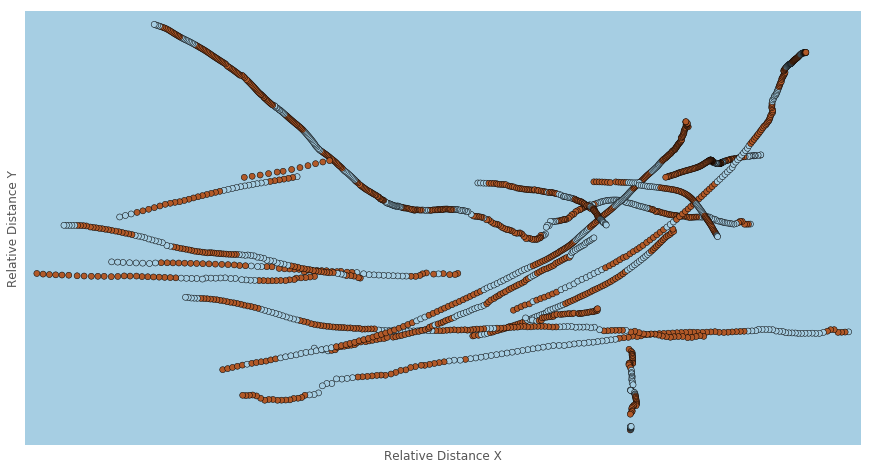

In [36]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = X['relative_X'].min() - .5, X['relative_X'].max() + .5
y_min, y_max = X['relative_Y'].min() - .5, X['relative_Y'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
plt.figure(figsize=(15, 8))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X['relative_X'], X['relative_Y'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.scatter(np.sqrt(X['relative_X']- X['relative_Y']), np.sqrt(X['relative_Vx']- X['relative_Vy']), c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Relative Distance X')
plt.ylabel('Relative Distance Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Second features: norm of distance and speed

In [25]:
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

MLInput=pd.read_csv('Input1')
MLInput=MLInput.drop(['Unnamed: 0'], axis=1)

# import some data to play with
X1 = MLInput.iloc[:,1:5]
Y1 = MLInput.iloc[:,-1]

print X1.head()
X_norm=pd.DataFrame()
X_norm['nD']=np.sqrt(np.square(X1['relative_X']+np.square(X1['relative_Y'])))
X_norm['nV']=np.sqrt(np.square(X1['relative_Vx']+np.square(X1['relative_Vy'])))
                     

print X_norm.head()
print '\n'
print Y.head()

[logreg,X_test]=train_model_LR(X_norm,Y)

   relative_X  relative_Y  relative_Vx  relative_Vy
0    6.958754   -3.623322     1.651246    -1.245171
1    7.045239   -3.694579     1.847171    -1.725204
2    7.083989   -3.741349     0.543171    -1.450014
3    7.082241   -3.789956    -0.140817    -1.115598
4    7.073622   -3.808130     0.074284    -0.913975
          nD        nV
0  20.087214  3.201697
1  20.695156  4.823500
2  21.081681  2.645710
3  21.446011  1.103741
4  21.575473  0.909634


0    1
1    1
2    1
3    1
4    1
Name: brake, dtype: int64


(1032L, 2777L) (1032L, 2777L) (1032L, 2777L)


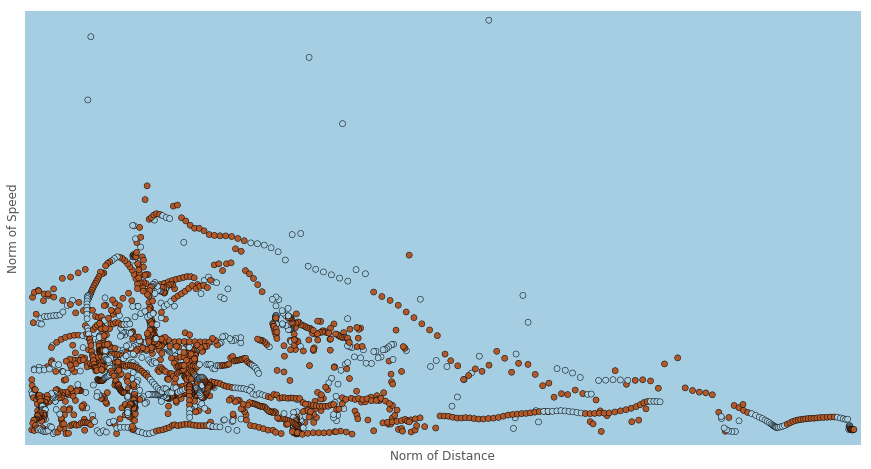

In [26]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = X_norm['nD'].min() - .5, X_norm['nD'].max() + .5
y_min, y_max = X_norm['nV'].min() - .5, X_norm['nV'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
plt.figure(figsize=(15, 8))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
print xx.shape, yy.shape, Z.shape
# Plot also the training points
plt.scatter(X_norm['nD'], X_norm['nV'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.scatter(np.sqrt(X['relative_X']- X['relative_Y']), np.sqrt(X['relative_Vx']- X['relative_Vy']), c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Norm of Distance')
plt.ylabel('Norm of Speed')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Second features: |alpha|, |dalpha|, tt_ped

In [27]:
#print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.preprocessing import MinMaxScaler
MLInput2=pd.read_csv('Input2')

# import some data to play with
X2 = MLInput2.iloc[:,1:4]
Y2 = MLInput2.iloc[:,-1]


## ================================================================================
##          SCALING THE FEATURES 
min_max_scaler = MinMaxScaler()
X2[['alpha','delta_alpha', 'tt_ped']] = min_max_scaler.fit_transform(X2)

print X2.head()
print '\n'
print Y2.head()
[logreg, X_test]=train_model_LR(X2,Y2)

      alpha  delta_alpha    tt_ped
0  0.153834     0.433630  0.005872
1  0.154772     0.512867  0.007250
2  0.155710     0.512867  0.009157
3  0.849847     0.153928  0.012096
4  0.158261     0.871457  0.017470


0    0
1    1
2    1
3    1
4    1
Name: brake, dtype: int64


In [28]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
names = list(X2)
rf = RandomForestRegressor()
rf.fit(X2, Y2)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Features sorted by their score:
[(0.3847, 'alpha'), (0.3371, 'tt_ped'), (0.2782, 'delta_alpha')]


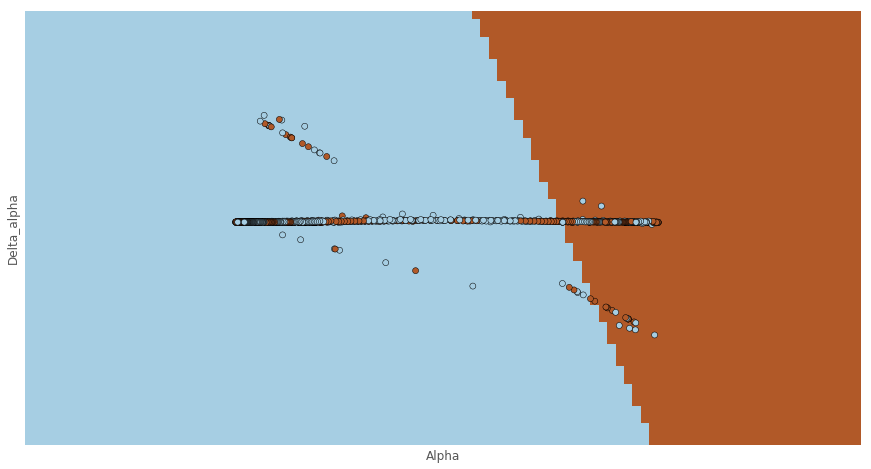

In [29]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = X2['alpha'].min() - .5, X2['alpha'].max() + .5
y_min, y_max = X2['delta_alpha'].min() - .5, X2['delta_alpha'].max() + .5

xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 8))
# Put the result into a color plot
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X2['alpha'], X2['delta_alpha'], c=Y2, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Alpha')
plt.ylabel('Delta_alpha')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

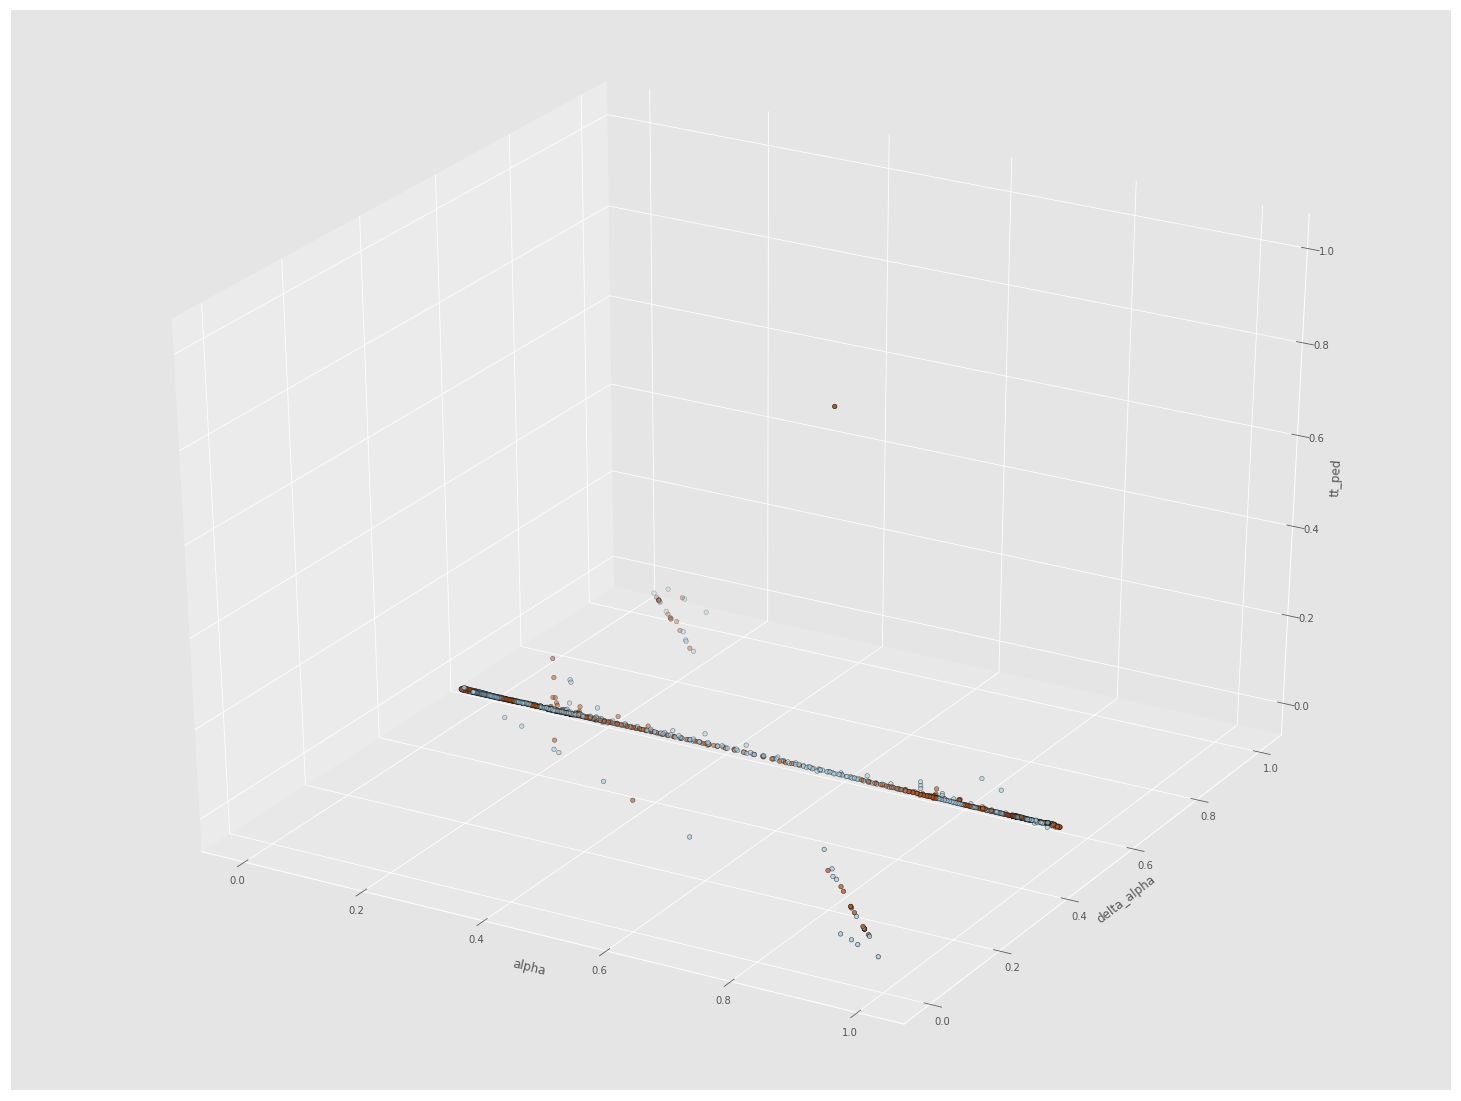

In [31]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
from mpl_toolkits.mplot3d import Axes3D

h = 5  # step size in the mesh
x_min, x_max = X2['alpha'].min() - .5, X2['alpha'].max() + .5
y_min, y_max = X2['delta_alpha'].min() - .5, X2['delta_alpha'].max() + .5
z_min, z_max = X2['tt_ped'].min() - .5, X2['tt_ped'].max() + .5

xx, yy, zz= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max, h*100))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])


#Z = Z.reshape(xx.shape)
# plt.figure(figsize=(20, 15))
# Put the result into a color plot
# plt.figure(1, figsize=(4, 3))
# plt.pcolormesh(xx, yy,zz, Z, cmap=plt.cm.Paired)

# Plot also the training points
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig)
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())
# ax.set_zlim(0, 0.0001)
ax.scatter(X2['alpha'], X2['delta_alpha'], X2['tt_ped'] , c=Y2, edgecolors='k', cmap=plt.cm.Paired)
ax.set_xlabel('alpha')
ax.set_ylabel('delta_alpha')
ax.set_zlabel('tt_ped')


# plt.xticks(())
# plt.yticks(())
plt.show()